# **Tarea 1 Grafos bipartitos y centralidad**
#### José Luis Toro Pinto

## 1a. Objetivo central y metodología
El objetivo central de la investigación es demostrar la relación entre diferentes culturas indigenas seleccionadas del noroeste de América del Sur y su herencia biológica, es decir, el uso de la flora como herramienta, medicina y aliemento.

Esta relación se trabaja como un grafo bipartito para cada etnia por separado donde el grupo A será la flora, en este caso especies de palmeras, y el grupo B será los usos dados por la etnia donde cada arista entre un grupo y otro es el conocimiento de la especie de palmera para hacer un uso particular.

La similitud de la redes realizadas se midió mediante dos métricas:

- Si las etnias hablan el mismo idioma y cual es la población que habla ese idioma.
- La distancia geográfica entre las etnias.

Se midió la robustez de la red eliminando aristas transversalmente para todas las etnias, encontrando que la perdida de conocimiento reducía la red tan rápido como la extinción de una especie de palmera.

<span style="color:red"> 

- Te recomiendo explicar un poco más en detalle qué es lo que pretende el paper. Sirve imaginar que el que lee el notebook no conoce (tanto) el paper. De esta forma, se entiende mejor por qué se utilizaron redes bipartitas.
- Falta mencionar muy brevemente (y de manera simple) qué es un grafo bipartito. Luego, puedes mostrar cómo se aplica  a este caso particular.
- No se entiende muy bien la parte en que cuentas sobre la similitud y la robustez. 
- Hay algunos errores de tipeo y de ortografía.
- Sería super útil que aparte de contar sobre el paper, introduzcas qué vas a hacer en la tarea. 

</span>

## **1b. Redes bipartitas**

<span style="color:red"> 

- Un poco en la línea de los comentarios anteriores, podrías ir explicando qué vas a hacer en cada sección. 
- ¿Cómo construyes las redes bipartitas?
- ¿Cómo son los datos? ¿Qué representan?

</span>

In [89]:
#importando librerias
import csv
import networkx as nx
from tabulate import tabulate
from networkx.algorithms import bipartite


In [3]:
#cargar los datos
unique_species = set()
unique_services = set()
edges = {}

with open("./tareas/datos-networks.csv", 'r') as csvfile:
    csvreader = csv.reader(csvfile, delimiter = ',')
    next(csvreader)
    for row in csvreader:
        group = row[0]
        unique_species.add(row[1])
        unique_services.add(row[2])
        pair = (row[1], row[2])
        if group in edges:
            edges[group].append(pair)
        else:
            edges[group] = list([pair])
        

In [56]:
unique_services.intersection(unique_species)

set()

<span style="color:red"> 

- Falta explicar qué vas haciendo. Muy breve!
- ¿Qué es un "grupo"?

</span>

In [86]:
#generar las redes bipartitas para cada grupo
graphs = {}
for group in edges:
    G = nx.Graph()
    for nodeA, nodeB in edges[group]:
        G.add_node(nodeA, bipartite=0)
        G.add_node(nodeB, bipartite=1)
        G.add_edge(nodeA, nodeB)
    #G.add_edges_from(edges[group])
    graphs[group] = G



## **1b. (again?) Descripción de las redes**

Primero miramos cada comunidad de manera general. Luego revisamos los grupos con el mayor número de nodos, aristas, plantas y usos.

<span style="color:red"> 

- Podrías un poco más preciso en qué vas a hacer.
- ¿Qué significa de forma "general"?
- Estas partes quedaron bien claras en la exposición; la idea es que también queden claras aquí en el notebook. Anda contando brevemente qué vas haciendo y cosas ves. 

</span>

In [87]:
#encabezado
header = [
    "Comunidad", 
    "Número Nodos", 
    "Número Aristas", 
    "Número Especies", 
    "Número Usos", 
    "Grado Promedio"
]
table= []
#Generamos las tuplas para la tabla
for community in graphs:
    species = set(n for n,d in graphs[community].nodes(data=True) if d['bipartite']==0)
    services = set(n for n,d in  graphs[community].nodes(data=True) if d['bipartite']==1)
    #print(nx.info(graphs[community]))
    row = [
        community,
        graphs[community].number_of_nodes(),
        graphs[community].number_of_edges(),
        len(species),
        len(services),
        sum(d for n, d in graphs[community].degree()) / float(graphs[community].number_of_nodes())
    ]
    table.append(row)

### 1b.1 Tabla de descripción general por comunidad

In [94]:
print(tabulate(table, headers=header, tablefmt="grid"))

+-------------------------+----------------+------------------+-------------------+---------------+------------------+
| Comunidad               |   Número Nodos |   Número Aristas |   Número Especies |   Número Usos |   Grado Promedio |
+=========================+================+==================+===================+===============+==================+
| Zabalo                  |             54 |               84 |                25 |            29 |          3.11111 |
+-------------------------+----------------+------------------+-------------------+---------------+------------------+
| Yucuna                  |             82 |              171 |                25 |            57 |          4.17073 |
+-------------------------+----------------+------------------+-------------------+---------------+------------------+
| Yamayakat               |             54 |              111 |                15 |            39 |          4.11111 |
+-------------------------+----------------+----

<span style="color:red"> 

- ¿Qué cosas concluyes de aquí? ¿Qué observas? 
- Lo mismo para las tablas que siguen.
- Son súper interesantes estos resultados, la idea es que resalten a través de una escritura ordenada y explicativa. 

</span>

### 1b.2 Top 5 Número de nodos

In [97]:
#top 5 con mayor número de nodos
from operator import itemgetter
top = sorted(table, key=itemgetter(1), reverse=True)[:5]
print(tabulate(top, headers=header, tablefmt="grid"))

+-------------------------+----------------+------------------+-------------------+---------------+------------------+
| Comunidad               |   Número Nodos |   Número Aristas |   Número Especies |   Número Usos |   Grado Promedio |
+=========================+================+==================+===================+===============+==================+
| San Martin de Amacayacu |            132 |              308 |                39 |            93 |          4.66667 |
+-------------------------+----------------+------------------+-------------------+---------------+------------------+
| Camaritagua             |            112 |              242 |                40 |            72 |          4.32143 |
+-------------------------+----------------+------------------+-------------------+---------------+------------------+
| Centro Providencia      |            106 |              255 |                31 |            75 |          4.81132 |
+-------------------------+----------------+----

### 1b.3 Top 5 Número de Aristas (Conocimiento)

In [98]:
top = sorted(table, key=itemgetter(2), reverse=True)[:5]
print(tabulate(top, headers=header, tablefmt="grid"))

+-------------------------+----------------+------------------+-------------------+---------------+------------------+
| Comunidad               |   Número Nodos |   Número Aristas |   Número Especies |   Número Usos |   Grado Promedio |
+=========================+================+==================+===================+===============+==================+
| San Martin de Amacayacu |            132 |              308 |                39 |            93 |          4.66667 |
+-------------------------+----------------+------------------+-------------------+---------------+------------------+
| Centro Providencia      |            106 |              255 |                31 |            75 |          4.81132 |
+-------------------------+----------------+------------------+-------------------+---------------+------------------+
| Camaritagua             |            112 |              242 |                40 |            72 |          4.32143 |
+-------------------------+----------------+----

### 1b.4 Top 5 Número de Especies

In [99]:
top = sorted(table, key=itemgetter(3), reverse=True)[:5]
print(tabulate(top, headers=header, tablefmt="grid"))

+-------------------------+----------------+------------------+-------------------+---------------+------------------+
| Comunidad               |   Número Nodos |   Número Aristas |   Número Especies |   Número Usos |   Grado Promedio |
+=========================+================+==================+===================+===============+==================+
| Camaritagua             |            112 |              242 |                40 |            72 |          4.32143 |
+-------------------------+----------------+------------------+-------------------+---------------+------------------+
| San Martin de Amacayacu |            132 |              308 |                39 |            93 |          4.66667 |
+-------------------------+----------------+------------------+-------------------+---------------+------------------+
| Curare                  |            104 |              205 |                33 |            71 |          3.94231 |
+-------------------------+----------------+----

### 1b.5 Top 5 Número de Usos

In [100]:
top = sorted(table, key=itemgetter(4), reverse=True)[:5]
print(tabulate(top, headers=header, tablefmt="grid"))

+-------------------------+----------------+------------------+-------------------+---------------+------------------+
| Comunidad               |   Número Nodos |   Número Aristas |   Número Especies |   Número Usos |   Grado Promedio |
+=========================+================+==================+===================+===============+==================+
| San Martin de Amacayacu |            132 |              308 |                39 |            93 |          4.66667 |
+-------------------------+----------------+------------------+-------------------+---------------+------------------+
| Centro Providencia      |            106 |              255 |                31 |            75 |          4.81132 |
+-------------------------+----------------+------------------+-------------------+---------------+------------------+
| Camaritagua             |            112 |              242 |                40 |            72 |          4.32143 |
+-------------------------+----------------+----

### 1b.6 Top 5 Grado Promedio

In [113]:
top = sorted(table, key=itemgetter(5), reverse=True)[:5]
print(tabulate(top, headers=header, tablefmt="grid"))

+-------------------------+----------------+------------------+-------------------+---------------+------------------+
| Comunidad               |   Número Nodos |   Número Aristas |   Número Especies |   Número Usos |   Grado Promedio |
+=========================+================+==================+===================+===============+==================+
| Centro Providencia      |            106 |              255 |                31 |            75 |          4.81132 |
+-------------------------+----------------+------------------+-------------------+---------------+------------------+
| San Martin de Amacayacu |            132 |              308 |                39 |            93 |          4.66667 |
+-------------------------+----------------+------------------+-------------------+---------------+------------------+
| Aguacate                |             82 |              191 |                28 |            54 |          4.65854 |
+-------------------------+----------------+----

### 1b.7 Gráficos

<span style="color:red"> 

- Cuenta qué vas a hacer aquí: ¿Qué son estos gráficos?
- ¿Qué puedes concluir? ¿Qué es el eje Y?

</span>

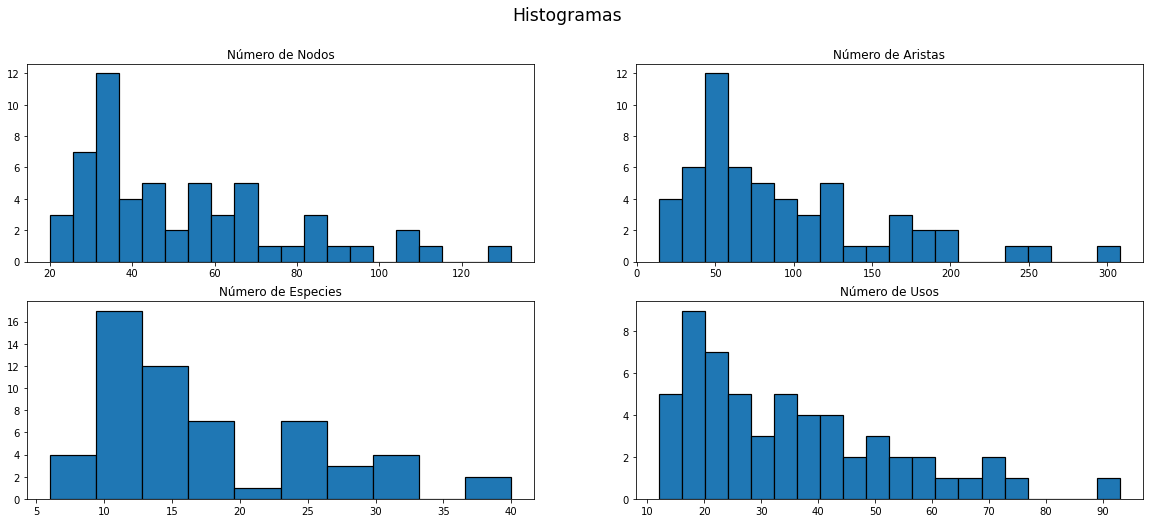

In [159]:

fig, axs = plt.subplots(2, 2, figsize = (20,8))
fig.suptitle('Histogramas', fontsize='xx-large')
axs[0,0].hist([x[1] for x in table], bins=20, edgecolor='black', linewidth=1.2)
axs[0, 0].set_title('Número de Nodos')
axs[0,1].hist([x[2] for x in table], bins=20, edgecolor='black', linewidth=1.2)
axs[0, 1].set_title('Número de Aristas')
axs[1,0].hist([x[3] for x in table], bins=10, edgecolor='black', linewidth=1.2)
axs[1, 0].set_title('Número de Especies')
axs[1,1].hist([x[4] for x in table], bins=20, edgecolor='black', linewidth=1.2)
axs[1, 1].set_title('Número de Usos')
plt.show()

<span style="color:red"> 

- Explica qué significa este gráfico y qué conclusiones puedes sacar. 

</span>

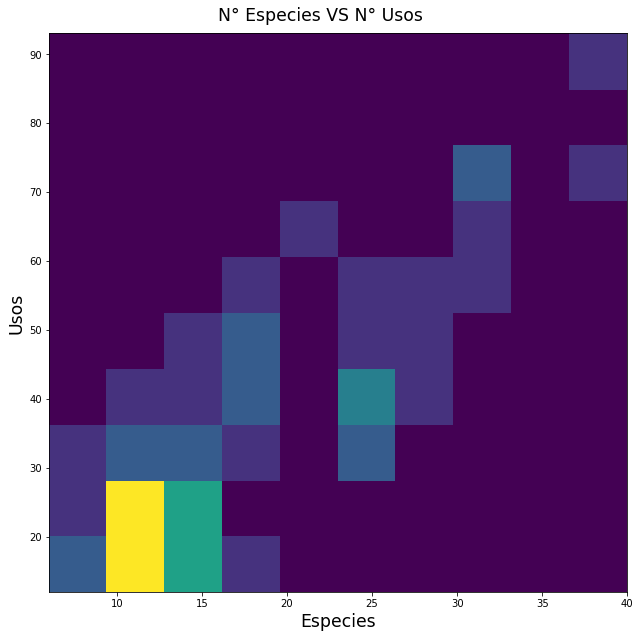

In [168]:
fig, ax = plt.subplots(tight_layout=True, figsize=(9,9))
fig.suptitle("N° Especies VS N° Usos", fontsize='xx-large' )
ax.set_xlabel('Especies', fontsize='xx-large')
ax.set_ylabel('Usos', fontsize='xx-large')
hist = ax.hist2d([x[3] for x in table], [x[4] for x in table])

### 1.d Redes proyectadas
Dentro de los datos encontrados en la sección anterior podemos ver que la red con más nodos es la de la comunidad **San Martin de Amacayacu** de la cual crearemos 2 redes proyectadas, una para las especies de palmera y otra para los usos dados a estas.
Para una mayor visualización del grafo, este completo se puede ver a continuación:

<span style="color:red"> 

- Sería útil para el lector saber qué es proyectar una red bipartita y por qué es relevante aquí.
- Revisa un poco la redacción de este párrafo. 
- falta que expliques un poco las representaciones de las redes. 

</span>

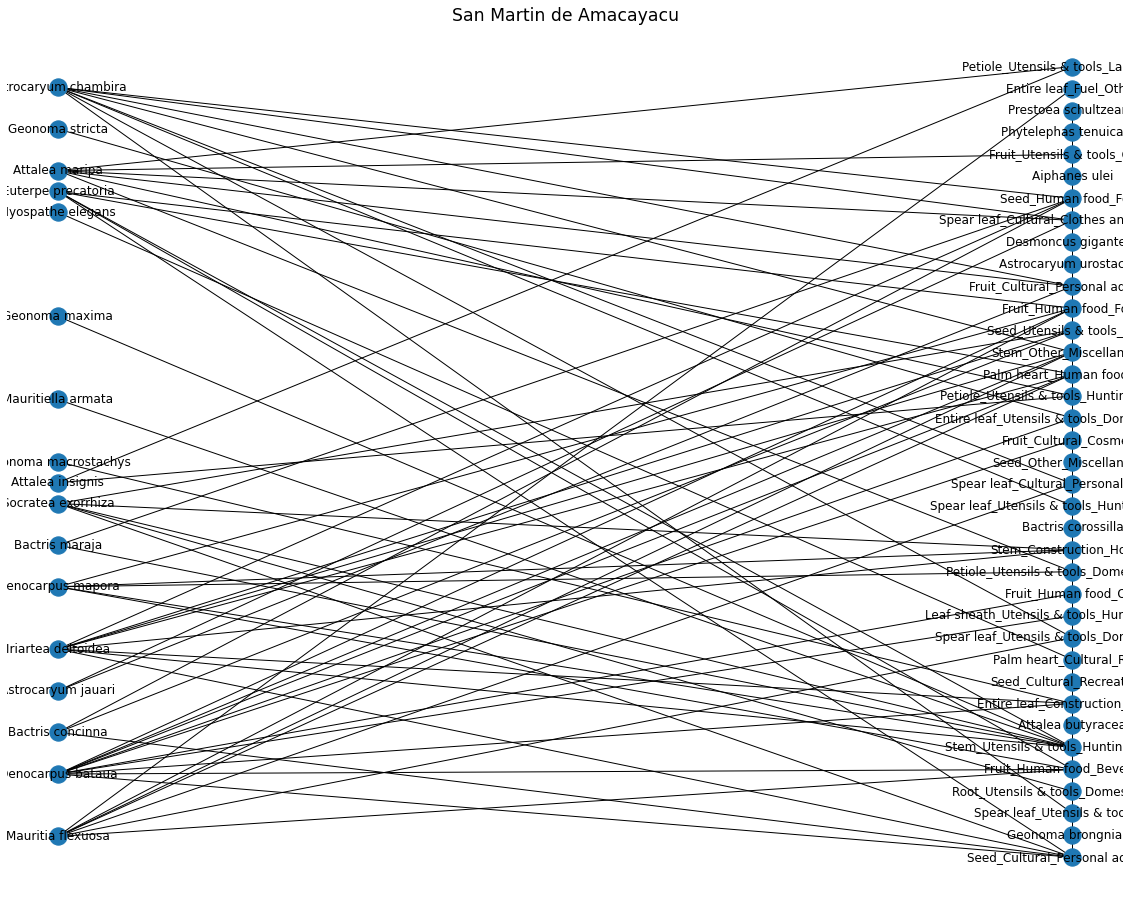

In [170]:
#Nodos proyectados
ommunity= "San Martin de Amacayacu"
graphs[community]
species = set(n for n,d in graphs[community].nodes(data=True) if d['bipartite']==0)
services = set(n for n,d in  graphs[community].nodes(data=True) if d['bipartite']==1)
G = bipartite.projected_graph(graphs[community], list(species))
G2 = bipartite.projected_graph(graphs[community], list(services))

#Graficar el grafico completo
plt.figure(1,figsize=(20,16))
plt.title("San Martin de Amacayacu", fontsize='xx-large')
pos = nx.drawing.layout.bipartite_layout(tmp, G)
nx.draw(tmp, with_labels=True, pos = pos)

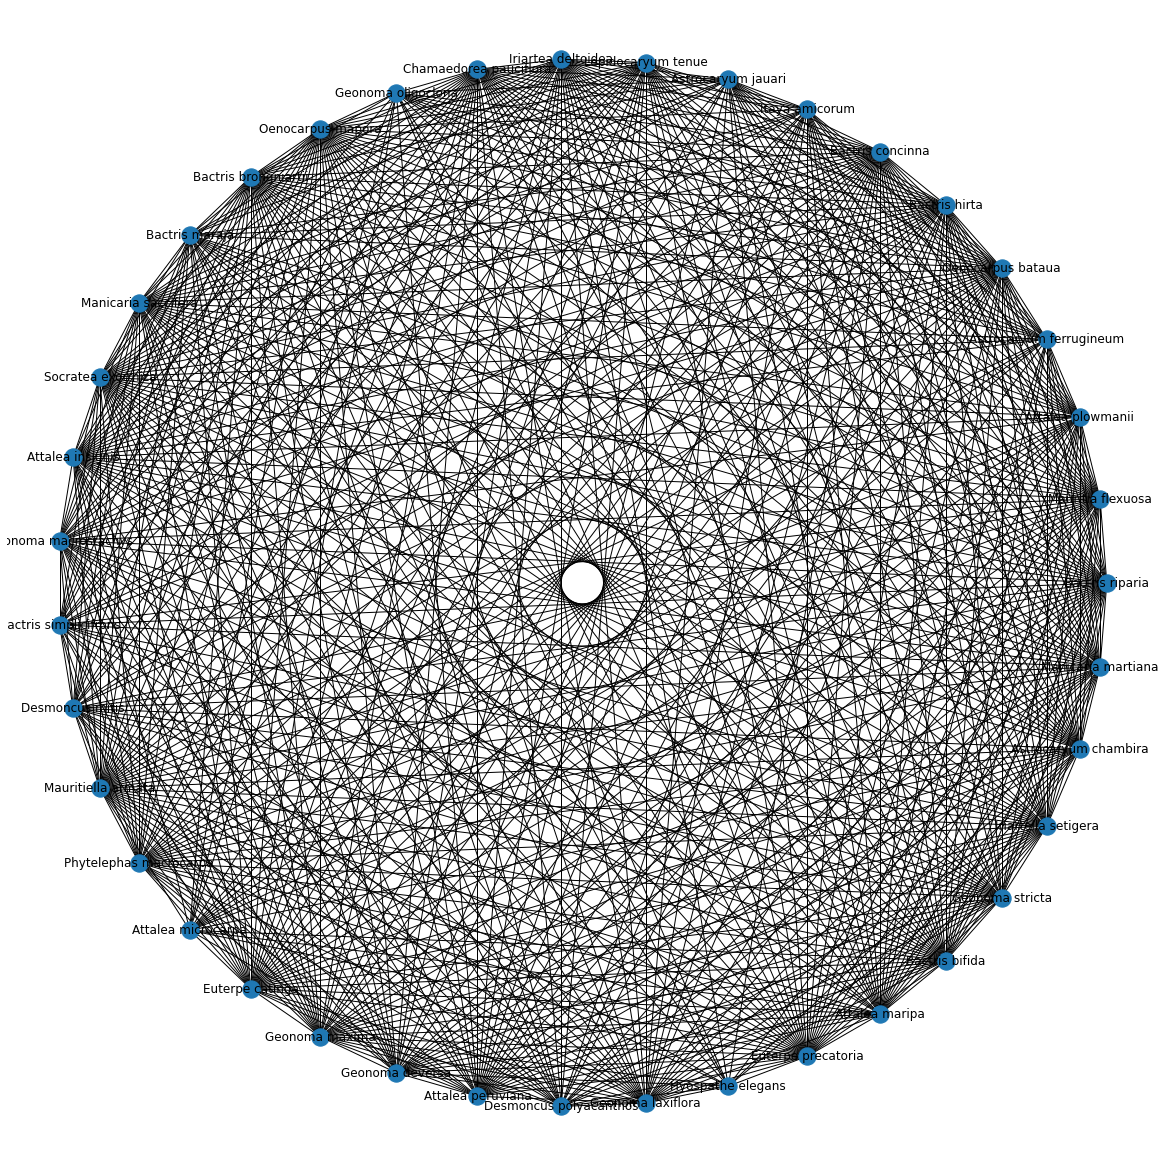

In [132]:
plt.figure(1,figsize=(16,16)) 
nx.draw_circular(G, with_labels=True)

plt.show()

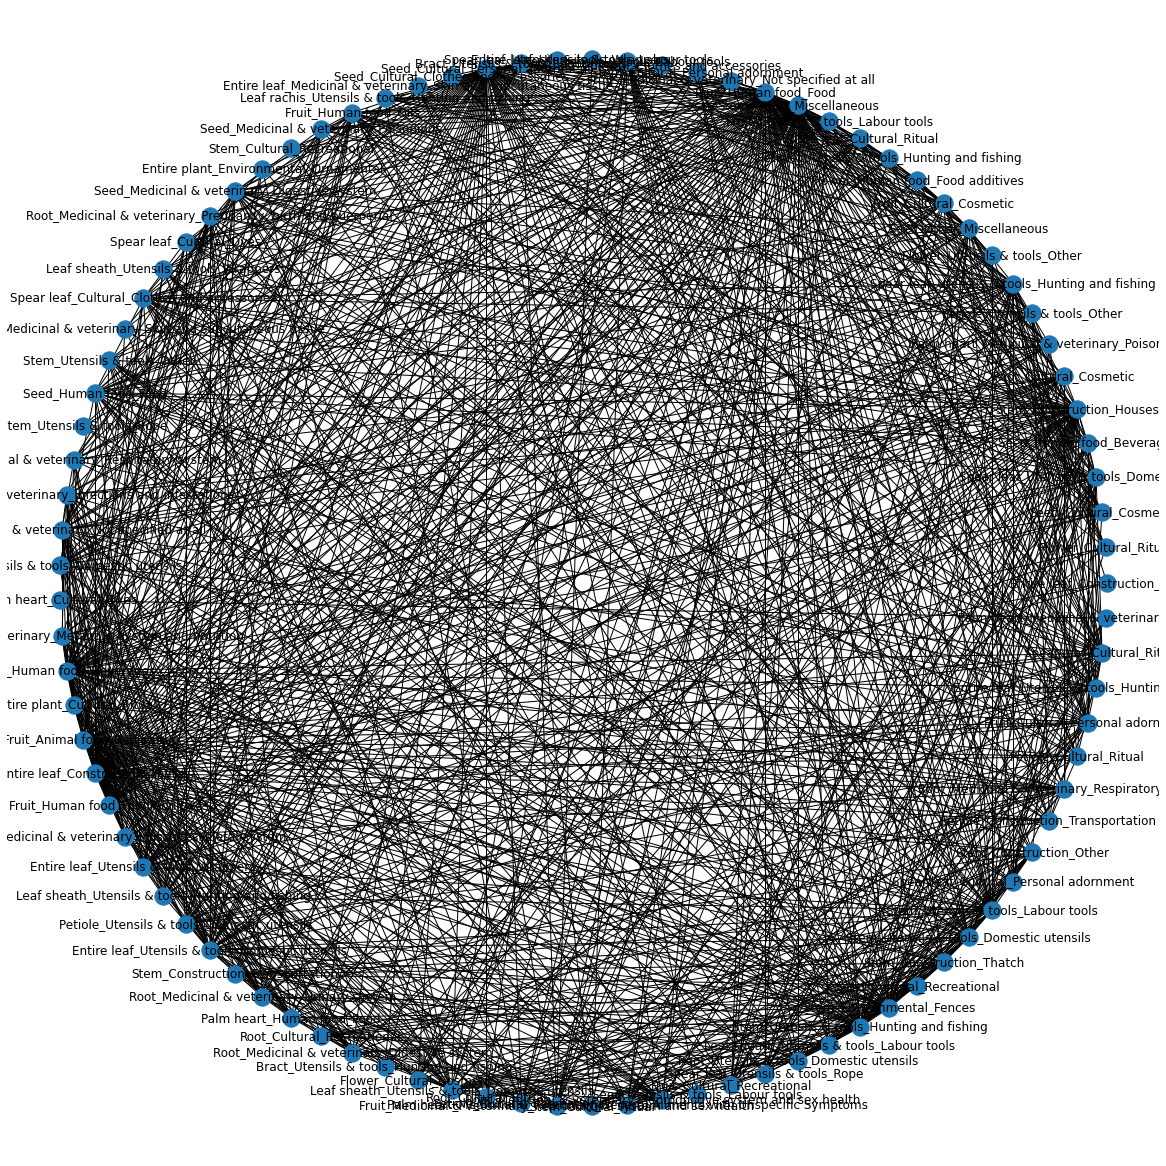

In [133]:
plt.figure(1,figsize=(16,16)) 
nx.draw_circular(G2, with_labels=True)

plt.show()

## 2. Análisis de centralidad

Revisamos las redes proyectadas mediante 3 medidas de centralidad:

- Centralidad de Grado
- Centralidad de Eigenvector
- Centralidad harmónica

Con estos datos tomaremos los 10 nodos más importantes de cada red en base a cada una de estas métricas

### 2.1 Top 10 Nodos Especies 

In [188]:
#encabezado
header = [
    "Especie", 
    "Grado", 
    "Eigenvector", 
    "Harmónica"
]
table= []
#Generamos las tuplas para la tabla
degree = nx.algorithms.degree_centrality(G)
eigen = nx.algorithms.eigenvector_centrality(G)
harmonic = nx.algorithms.harmonic_centrality(G)

for species in list(G.nodes):
    row = [
        species,
        degree[species],
        eigen[species],
        harmonic[species]
    ]
    table.append(row)
    
top = sorted(table, key=itemgetter(1,2,3), reverse=True)[:10]
print(tabulate(top, headers=header, tablefmt="grid"))

+------------------------+----------+---------------+-------------+
| Especie                |    Grado |   Eigenvector |   Harmónica |
+========================+==========+===============+=============+
| Oenocarpus mapora      | 1        |      0.180214 |        38   |
+------------------------+----------+---------------+-------------+
| Mauritiella armata     | 1        |      0.180214 |        38   |
+------------------------+----------+---------------+-------------+
| Euterpe precatoria     | 1        |      0.180214 |        38   |
+------------------------+----------+---------------+-------------+
| Mauritia flexuosa      | 0.973684 |      0.177876 |        37.5 |
+------------------------+----------+---------------+-------------+
| Oenocarpus bataua      | 0.973684 |      0.177876 |        37.5 |
+------------------------+----------+---------------+-------------+
| Chamaedorea pauciflora | 0.973684 |      0.177876 |        37.5 |
+------------------------+----------+-----------

### 2.2 Top 10 Nodos Usos 

In [189]:
#encabezado
header = [
    "Uso", 
    "Grado", 
    "Eigenvector", 
    "Harmónica"
]
table= []
#Generamos las tuplas para la tabla
degree = nx.algorithms.degree_centrality(G2)
eigen = nx.algorithms.eigenvector_centrality(G2)
harmonic = nx.algorithms.harmonic_centrality(G2)

for species in list(G2.nodes):
    row = [
        species,
        degree[species],
        eigen[species],
        harmonic[species]
    ]
    table.append(row)
    
top = sorted(table, key=itemgetter(1,2,3), reverse=True)[:10]
print(tabulate(top, headers=header, tablefmt="grid"))

+------------------------------------------------+----------+---------------+-------------+
| Uso                                            |    Grado |   Eigenvector |   Harmónica |
+================================================+==========+===============+=============+
| Entire leaf_Construction_Thatch                | 0.902174 |      0.247445 |        87.5 |
+------------------------------------------------+----------+---------------+-------------+
| Seed_Cultural_Personal adornment               | 0.815217 |      0.227291 |        83.5 |
+------------------------------------------------+----------+---------------+-------------+
| Stem_Other_Miscellaneous                       | 0.804348 |      0.240097 |        83   |
+------------------------------------------------+----------+---------------+-------------+
| Fruit_Human food_Food                          | 0.76087  |      0.225012 |        81   |
+------------------------------------------------+----------+---------------+---

En base a los resultados entregados por las métricas podemos ver la importancia de la existencia o desaparición de alguna especie de palmera dentro de la red en general, particularmente por su centralidad de grado y harmónica. Pero por otro lado esto también sucede, aunque en menor manera con los usos de estas especies, que, tal como indica el paper, la desaparición de este conocimiento puede ser tan disruptivo para la red como la extinción de alguna especie.

<span style="color:red"> 

- ¿Por qué las medidas que elegiste? ¿Qué significan?
- Falta ahondar más en las conclusiones. 
- Trata de mejorar un poco la redacción. La idea es que sea simple de entender. 
</span>